In [3]:
from pprint import pprint

import scipy.stats
import numpy as np
import pandas as pd

from unfooling.pipeline import evaluate_detector
from unfooling.pipeline import generate_explanations
from unfooling.pipeline import load_experiment_and_data
from unfooling.pipeline import compute_metrics

c:\Users\JB838SF\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Configuration
Define the experiment name, the defense approach, and a few other settings.

In [4]:
class C:  # Config
    experiment_name = 'German'
    detector_name = 'KNNCAD'
    detect_proba = False
    test_size = 0.1
    debug = False

# Load Experiment
Load the experiment problem definition and its data.

In [5]:
P = load_experiment_and_data(C)

Features list: ['Gender', 'ForeignWorker', 'Single', 'Age', 'LoanDuration', 'LoanAmount', 'LoanRateAsPercentOfIncome', 'YearsAtCurrentHome', 'NumberOfOtherLoansAtBank', 'NumberOfLiableIndividuals', 'HasTelephone', 'CheckingAccountBalance_geq_0', 'CheckingAccountBalance_geq_200', 'SavingsAccountBalance_geq_100', 'SavingsAccountBalance_geq_500', 'MissedPayments', 'NoCurrentLoan', 'CriticalAccountOrLoansElsewhere', 'OtherLoansAtBank', 'OtherLoansAtStore', 'HasCoapplicant', 'HasGuarantor', 'OwnsHouse', 'RentsHouse', 'Unemployed', 'YearsAtCurrentJob_lt_1', 'YearsAtCurrentJob_geq_4', 'JobClassIsSkilled']


# Generate Explanations
For each explainer, generate explanations with and without the ``fooling'' adversarial attack(s).

In [6]:
explainer_data = generate_explanations(C, P)

---------------------
Beginning LIME German Experiments....
---------------------
Racist model only (not adversarial)


100%|██████████| 100/100 [00:01<00:00, 70.23it/s]


LIME Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 0 unrelated features:
{1: [('Gender', 1.0)],
 2: [('HasCoapplicant', 0.2),
     ('ForeignWorker', 0.19),
     ('NoCurrentLoan', 0.12),
     ('CheckingAccountBalance_geq_200', 0.11),
     ('HasGuarantor', 0.11)],
 3: [('ForeignWorker', 0.16),
     ('CheckingAccountBalance_geq_200', 0.13),
     ('NoCurrentLoan', 0.09),
     ('HasCoapplicant', 0.08),
     ('HasGuarantor', 0.08)]}
Fidelity (f) = N/A
Fidelity (dood) = N/A
Adversary with racist model and innocuous model InnocuousClassificationModel idxs=[6] reduce=<ufunc 'logical_xor'>
Adversarial model init took 0:00:02.078344


100%|██████████| 100/100 [00:02<00:00, 34.88it/s]


LIME Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 1 unrelated features:
{1: [('LoanRateAsPercentOfIncome', 1.0)],
 2: [('HasGuarantor', 0.18),
     ('NoCurrentLoan', 0.17),
     ('HasCoapplicant', 0.16),
     ('ForeignWorker', 0.13),
     ('CheckingAccountBalance_geq_200', 0.09)],
 3: [('SavingsAccountBalance_geq_500', 0.14),
     ('NoCurrentLoan', 0.13),
     ('Unemployed', 0.12),
     ('HasGuarantor', 0.1),
     ('MissedPayments', 0.1)]}
Fidelity (f) = 1.0
Fidelity (dood) = 0.99989
---------------------
Beginning SHAP German Experiments....
---------------------
Racist model only (not adversarial)


100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


SHAP Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 0 unrelated features:
{1: [('Gender', 1.0)], 2: [('Nothing shown', 1.0)], 3: [('Nothing shown', 1.0)]}
Fidelity (f) = N/A
Fidelity (dood) = N/A
Adversary with racist model and innocuous model InnocuousClassificationModel idxs=[6] reduce=<ufunc 'logical_xor'>
Adversarial model init took 0:00:07.559866


100%|██████████| 100/100 [00:31<00:00,  3.15it/s]


SHAP Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 1 unrelated features:
{1: [('LoanRateAsPercentOfIncome', 0.76),
     ('Gender', 0.14),
     ('LoanAmount', 0.04),
     ('Age', 0.03),
     ('LoanDuration', 0.01)],
 2: [('Gender', 0.37),
     ('LoanRateAsPercentOfIncome', 0.15),
     ('YearsAtCurrentHome', 0.14),
     ('LoanAmount', 0.08),
     ('LoanDuration', 0.08)],
 3: [('LoanDuration', 0.21),
     ('Single', 0.19),
     ('LoanAmount', 0.17),
     ('YearsAtCurrentHome', 0.11),
     ('Age', 0.08)]}
Fidelity (f) = 0.78
Fidelity (dood) = 0.66673


# Defense Hyperparameters

In [7]:
C.detector_name = 'KNNCAD'
hparams = dict(
    distance_agg='max',
    metric='minkowski',
    epsilon=0.1,
    n_neighbors=15,
    p=1,
    n_jobs=-1,
)
print(f'Using hparams for {C.detector_name}:')
pprint(hparams)

Using hparams for KNNCAD:
{'distance_agg': 'max',
 'epsilon': 0.1,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 15,
 'p': 1}


# Evaluation of the Defense
Here, the defense approach is evaluated on the explainers with and without the adversarial attack(s).

n_explainer_samples 9000
--- LIME None ---
Down-sampling X_samples to 9000 (1.80% of 500000 samples)
Fitting the model...
Variance of Residuals: 0.24711879850755636
Iteration:      1,   Func. Count:      8,   Neg. LLF: 135158.4195965413
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2367.2906837045707
Iteration:      3,   Func. Count:     27,   Neg. LLF: 467218322.78435075
Iteration:      4,   Func. Count:     37,   Neg. LLF: 966.6523020262125
Iteration:      5,   Func. Count:     44,   Neg. LLF: 966.5657935099865
Iteration:      6,   Func. Count:     51,   Neg. LLF: 966.5557475152716
Iteration:      7,   Func. Count:     58,   Neg. LLF: 966.5492231156662
Iteration:      8,   Func. Count:     65,   Neg. LLF: 966.5478414651964
Iteration:      9,   Func. Count:     72,   Neg. LLF: 966.5468834542952
Iteration:     10,   Func. Count:     79,   Neg. LLF: 966.5459565266721
Iteration:     11,   Func. Count:     86,   Neg. LLF: 966.5457563009746
Iteration:     12,   Func. Count:     93,

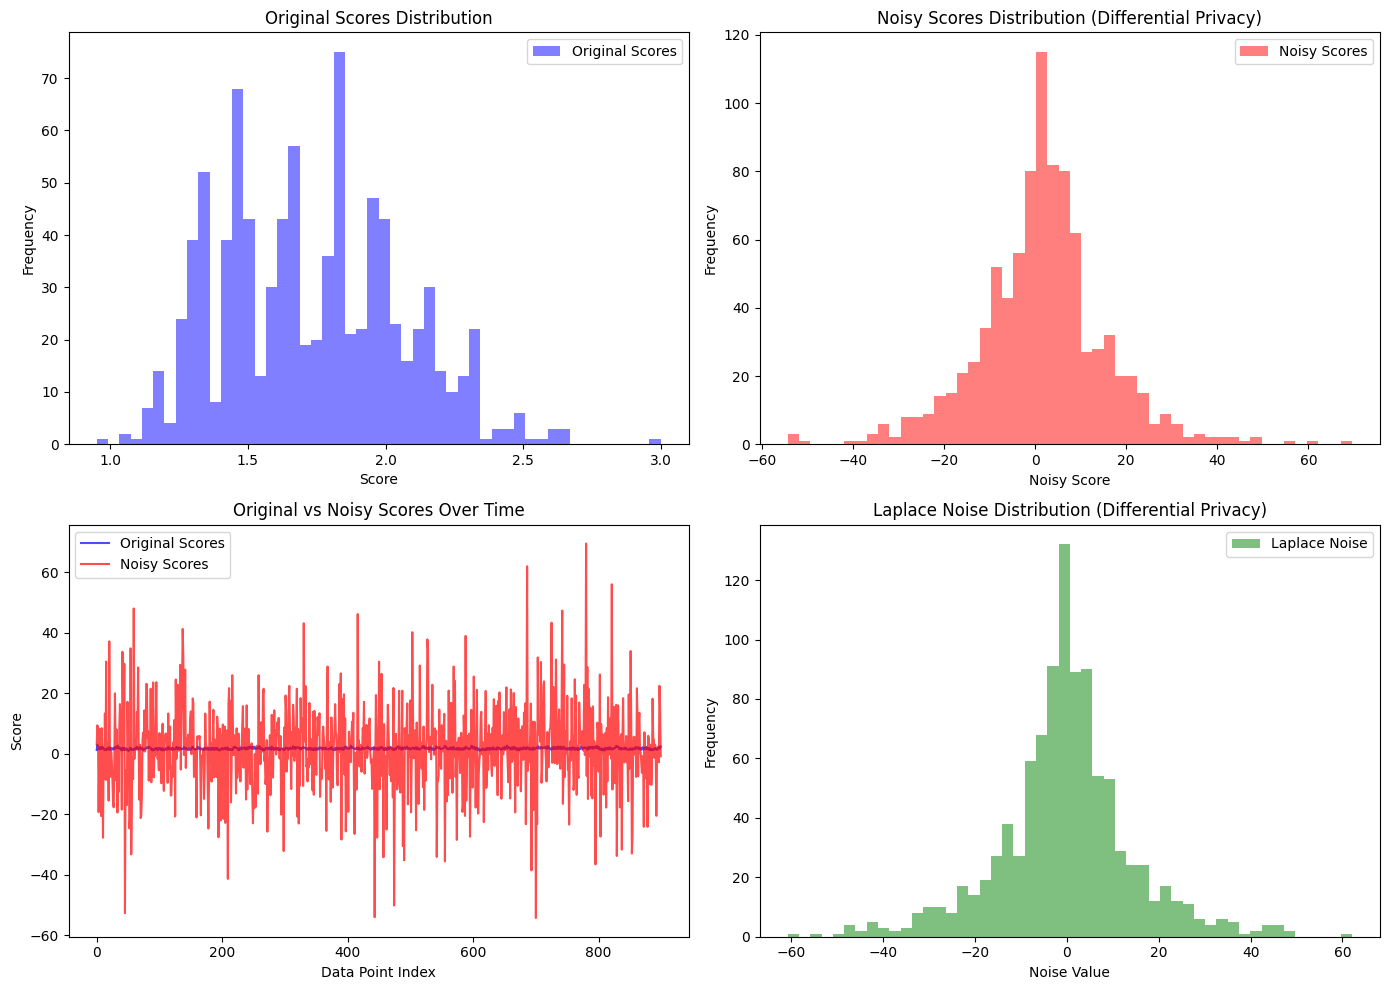

Detector fit took 0:00:00.908553
Detector predict OOD took 0:00:00.219190
reach that line #######################################:
fidelity_h (soft) = 0.27559
fidelity_h (hard) = 1.0
--- LIME 1Unrelated ---
Down-sampling X_samples to 9000 (1.80% of 500000 samples)
Fitting the model...
Variance of Residuals: 0.24711879850755636
Iteration:      1,   Func. Count:      8,   Neg. LLF: 135158.4195965413
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2367.2906837045707
Iteration:      3,   Func. Count:     27,   Neg. LLF: 467218322.78435075
Iteration:      4,   Func. Count:     37,   Neg. LLF: 966.6523020262125
Iteration:      5,   Func. Count:     44,   Neg. LLF: 966.5657935099865
Iteration:      6,   Func. Count:     51,   Neg. LLF: 966.5557475152716
Iteration:      7,   Func. Count:     58,   Neg. LLF: 966.5492231156662
Iteration:      8,   Func. Count:     65,   Neg. LLF: 966.5478414651964
Iteration:      9,   Func. Count:     72,   Neg. LLF: 966.5468834542952
Iteration:     10,   

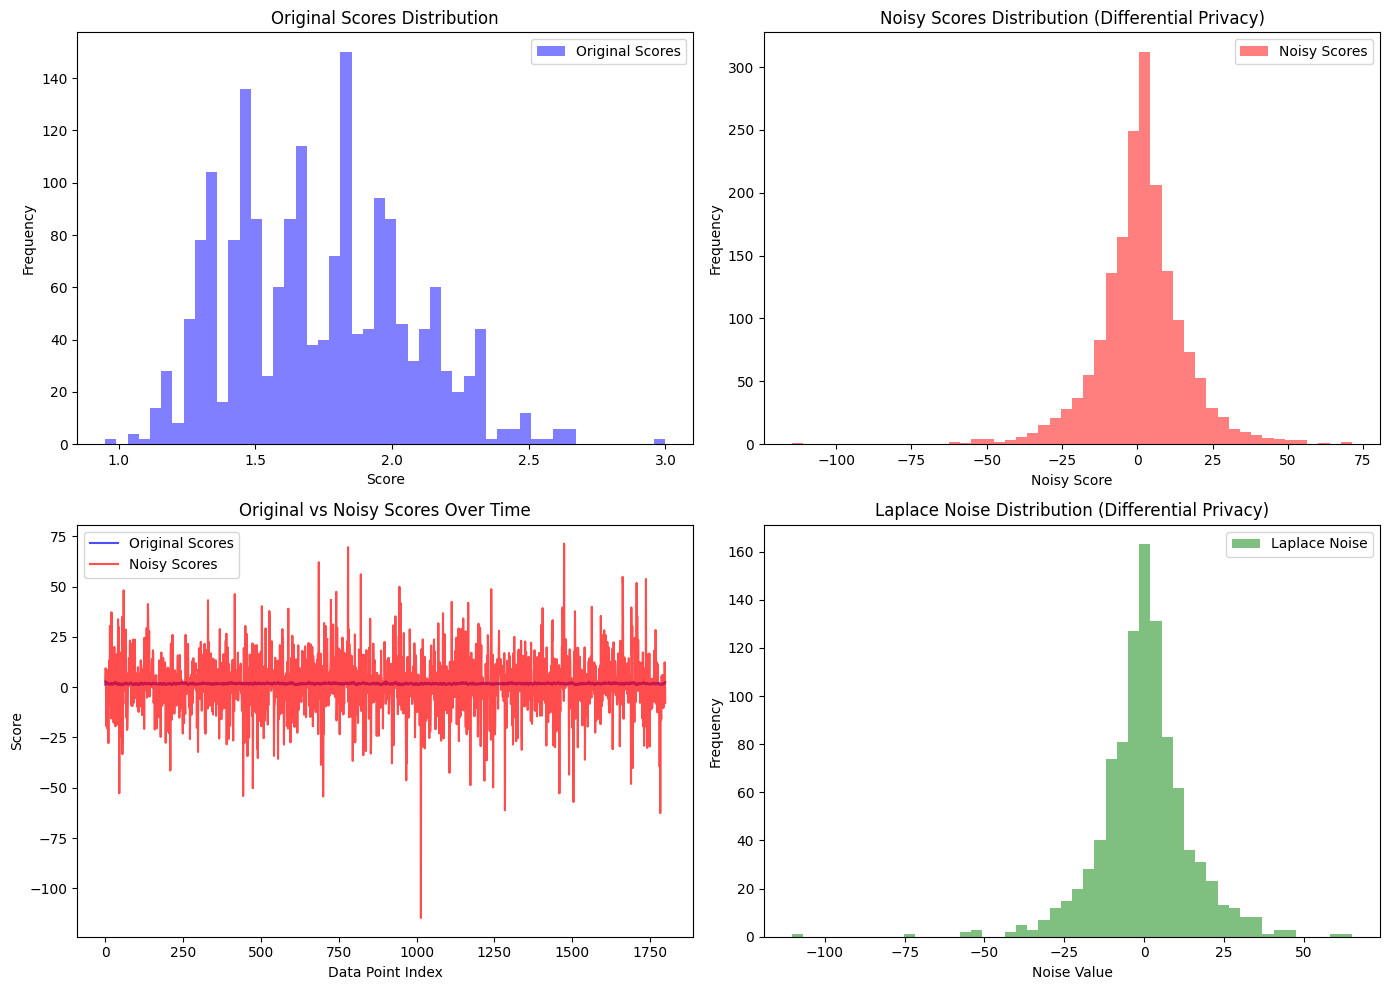

Detector fit took 0:00:00.570105
Detector predict OOD took 0:00:00.219003
reach that line #######################################:
fidelity_h (soft) = -0.81876
fidelity_h (hard) = 0.50017
--- SHAP None ---
Down-sampling X_samples to 9000 (0.21% of 4204000 samples)
Fitting the model...
Variance of Residuals: 0.24711879850755636
Iteration:      1,   Func. Count:      8,   Neg. LLF: 135158.4195965413
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2367.2906837045707
Iteration:      3,   Func. Count:     27,   Neg. LLF: 467218322.78435075
Iteration:      4,   Func. Count:     37,   Neg. LLF: 966.6523020262125
Iteration:      5,   Func. Count:     44,   Neg. LLF: 966.5657935099865
Iteration:      6,   Func. Count:     51,   Neg. LLF: 966.5557475152716
Iteration:      7,   Func. Count:     58,   Neg. LLF: 966.5492231156662
Iteration:      8,   Func. Count:     65,   Neg. LLF: 966.5478414651964
Iteration:      9,   Func. Count:     72,   Neg. LLF: 966.5468834542952
Iteration:     10,   

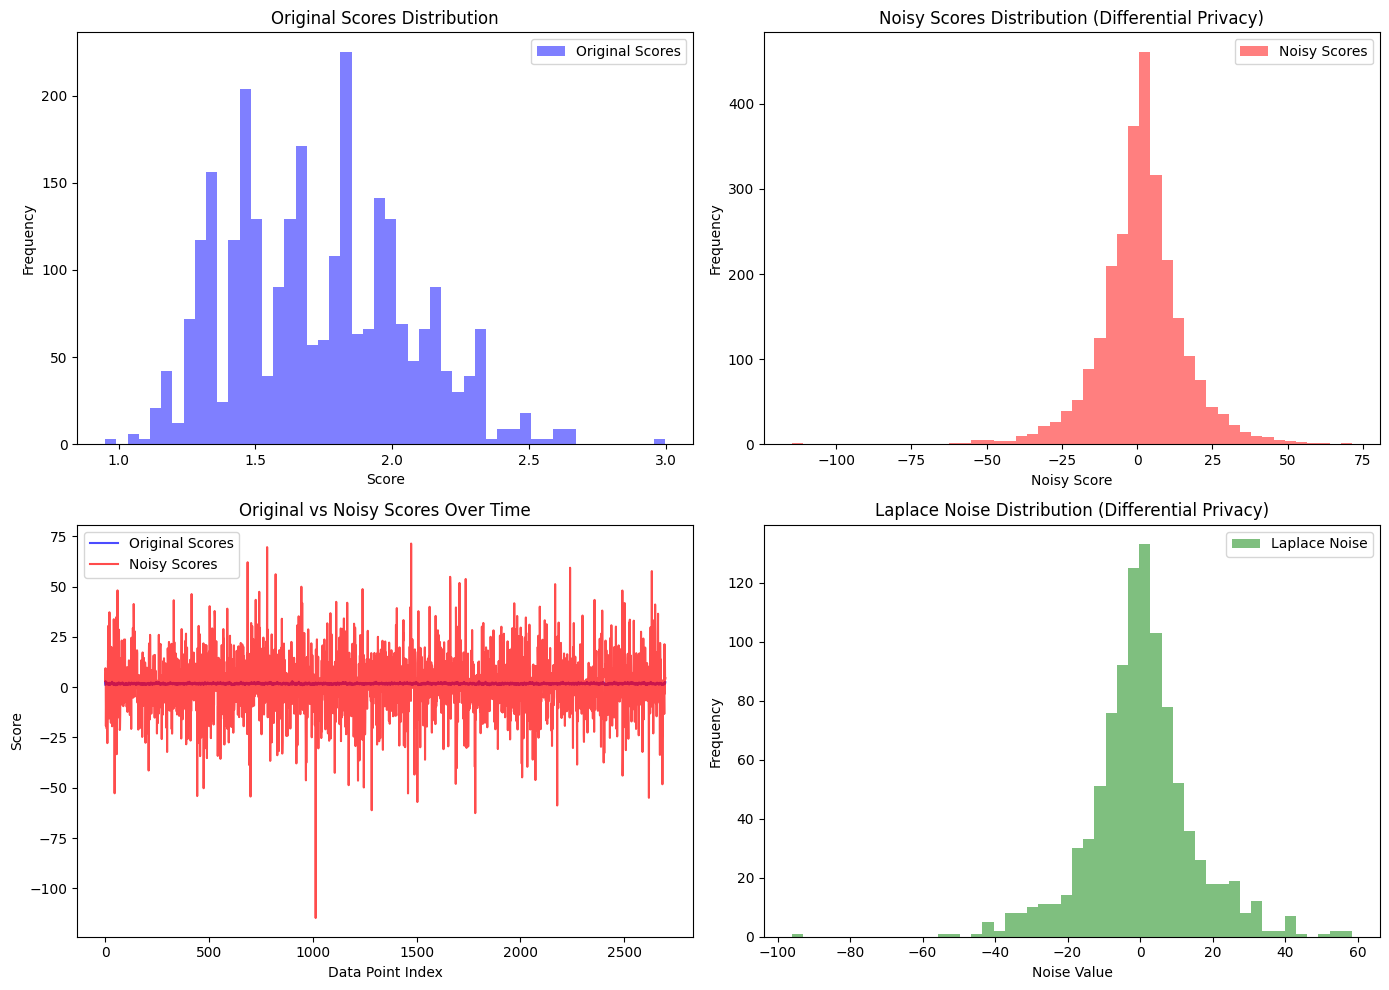

Detector fit took 0:00:00.524784
Detector predict OOD took 0:00:00.196305
reach that line #######################################:
fidelity_h (soft) = 0.26954
fidelity_h (hard) = 1.0
--- SHAP 1Unrelated ---
Down-sampling X_samples to 9000 (0.21% of 4204000 samples)
Fitting the model...
Variance of Residuals: 0.24711879850755636
Iteration:      1,   Func. Count:      8,   Neg. LLF: 135158.4195965413
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2367.2906837045707
Iteration:      3,   Func. Count:     27,   Neg. LLF: 467218322.78435075
Iteration:      4,   Func. Count:     37,   Neg. LLF: 966.6523020262125
Iteration:      5,   Func. Count:     44,   Neg. LLF: 966.5657935099865
Iteration:      6,   Func. Count:     51,   Neg. LLF: 966.5557475152716
Iteration:      7,   Func. Count:     58,   Neg. LLF: 966.5492231156662
Iteration:      8,   Func. Count:     65,   Neg. LLF: 966.5478414651964
Iteration:      9,   Func. Count:     72,   Neg. LLF: 966.5468834542952
Iteration:     10,  

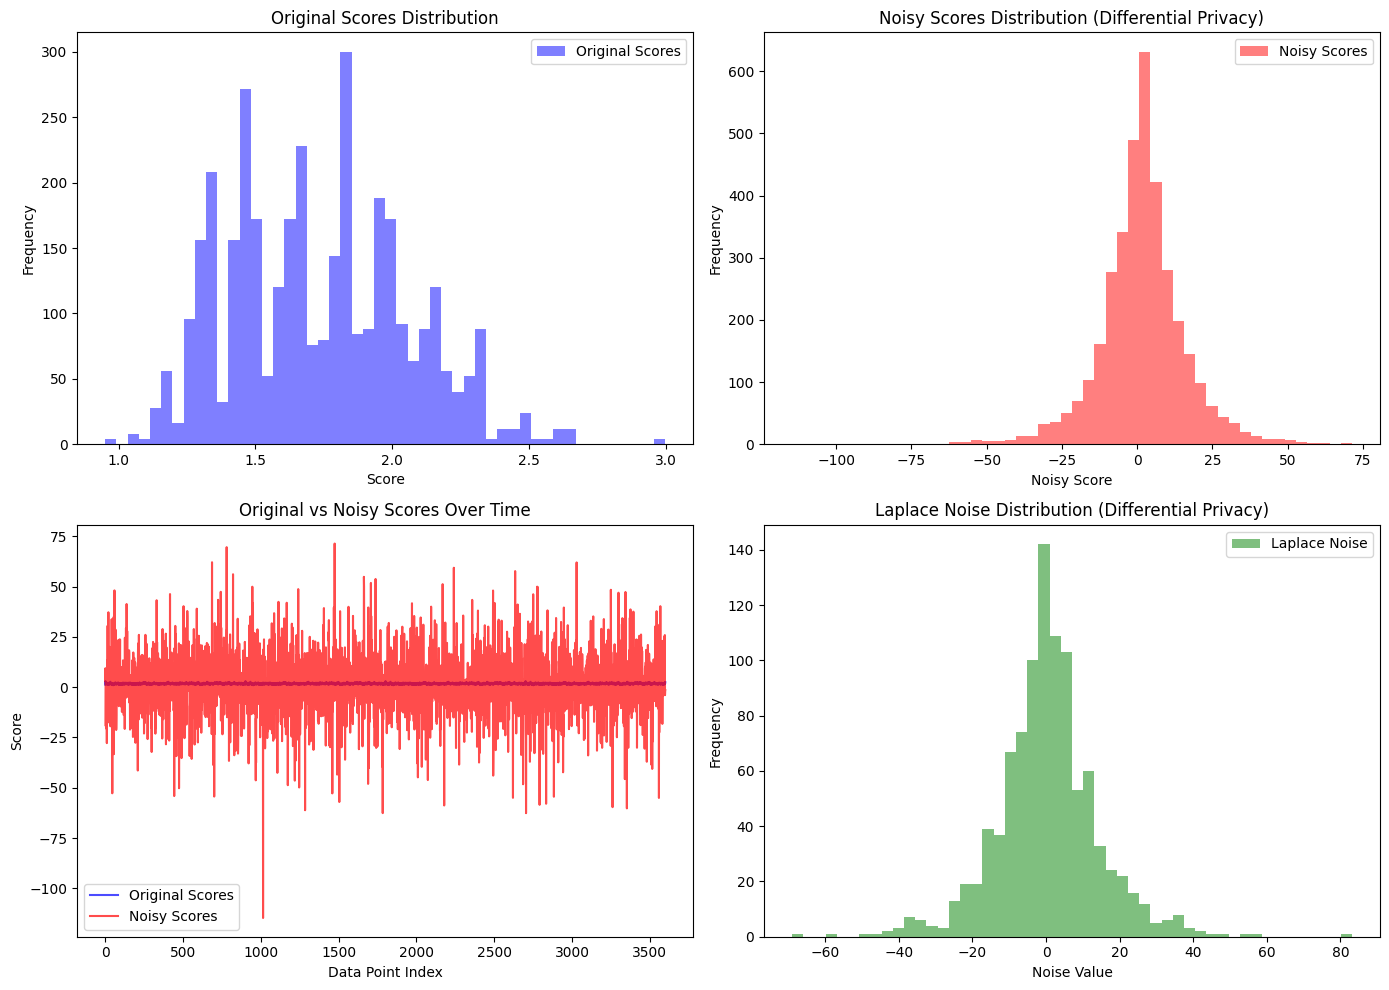

Detector fit took 0:00:00.651007
Detector predict OOD took 0:00:00.219149
reach that line #######################################:
fidelity_h (soft) = -1.3421
fidelity_h (hard) = 0.29489


In [8]:
n_explainer_samples = len(P.X_train) * 10
print('n_explainer_samples', n_explainer_samples)
results, detectors = evaluate_detector(C, P, explainer_data, hparams,
                                       n_explainer_samples=n_explainer_samples)

# Detection Evaluation Metrics
The gathered results for attack detection are shown in the subsequent blocks.

In [9]:
replace_strs = {
    'delta': 'Δ',
    'explainer': 'expl',
    'pct': '%',
    'threshold': 'thresh',
    'robust': 'R',
    'greater': '>',
    'under': '<',
    'normalized': 'norm',
}

scores = []
for result in results:
    score = compute_metrics(result)
    for k, v in [*score.items()]:
        k_orig = k
        for a, b in replace_strs.items():
            k = k.replace(a, b)
        score[k] = score.pop(k_orig)
    score.update(
        explainer=result.meta.explainer,
        innocuous_model=result.meta.innocuous_model,
    )
    scores.append(score)

score_df = pd.DataFrame(scores)
score_df

cdf_Δ_expl_test_R_norm  cdf_area_expl_R_norm  cdf_area_test_R_norm  \
0               -0.068093              0.219273              0.263284   
1               -0.002000              0.277289              0.263284   
2               -0.101656              0.177318              0.263284   
3               -0.088156              0.218025              0.281687   

   %_cdf_>_expl_test_R_norm  cdf_area_above_expl_test_R_norm  \
0                  0.244661                        -0.068028   
1                  0.516225                        -0.002020   
2                  0.000000                        -0.101658   
3                  0.000370                        -0.088067   

   cdf_Δ_ratio_expl_test_R_norm  cdf_Δ_expl_test_R  cdf_area_expl_R  \
0                      0.763045          -0.154353         0.497049   
1                      0.992838          -0.004483         0.621514   
2                      0.635605          -0.228034         0.397759   
3                      0.712079          -0.197350         0.488081   

   cdf_area_test_R  %_cdf_>_expl_test_R  ...  cdf_area_above_test_train  \
0         0.577868             0.244661  ...                   0.042564   
1         0.577868             0.516225  ...                   0.042564   
2         0.577868             0.000000  ...                   0.042564   
3         0.609465             0.000370  ...                   0.100459   

   cdf_Δ_ratio_test_train  peak_Δs_expl  peak_Δs_test  peak_Δs_train  \
0                1.036066      0.734459      0.284373       0.203851   
1                1.036066      0.767599      0.284373       0.203851   
2                1.036066      0.231163      0.284373       0.203851   
3                1.082170      0.329898      0.225460       0.203851   

   <_thresh_expl  <_thresh_test  <_thresh_train  explainer  innocuous_model  
0       0.473222           0.58        0.551111       LIME               NA  
1       0.605667           0.58        0.551111       LIME       1Unrelated  
2       0.552556           0.58        0.551111       SHAP               NA  
3       0.639000           0.64        0.551111       SHAP       1Unrelated  

[4 rows x 68 columns]

In [10]:
for explainer, explainer_score_df in score_df.groupby('explainer'):
    score_map = dict(tuple(explainer_score_df.groupby('innocuous_model')))
    for task, expl_score_df in explainer_score_df.groupby('innocuous_model'):
        fidelity_task = expl_score_df['cdf_Δ_expl_test'].values[0]
        print('cdf_Δ', explainer, task, fidelity_task)

cdf_Δ LIME 1Unrelated -0.0029755911330882068
cdf_Δ LIME NA -0.1391012482015026
cdf_Δ SHAP 1Unrelated -0.17833347503631214
cdf_Δ SHAP NA -0.20468883717146102


In [11]:
biased_features = P.problem.biased_features
n_feats = P.X_test.shape[1]

for explainer, expl_expl_data in explainer_data.items():
    for task, expl_expl_task_data in expl_expl_data.items():
        explanations = expl_expl_task_data['explanations']
        y_test_pred_f = expl_expl_task_data['y_test_pred_f_biased']
        if y_test_pred_f is None:
            y_test_pred_f = expl_expl_task_data['y_test_pred']
        score = 0
        for yi, expl in zip(y_test_pred_f, explanations):
            expl = {k.rsplit('=', 1)[0]: v for k, v in expl}
            # ascending
            expl_keys_asc = sorted(expl.keys(), key=lambda x: expl[x])
            f_ranks = []
            expl_ranks = []
            for feat in biased_features:
                f_ranks.append(n_feats - 1)
                try:
                    expl_ranks.append(expl_keys_asc.index(feat))
                except ValueError:
                    expl_ranks.append(0)
            for feat in biased_features:
                rank_f = n_feats - 1
                try:
                    rank = expl_keys_asc.index(feat)
                except ValueError:
                    rank = 0
                if yi == 0:
                    rank_f = n_feats - rank_f
                    rank = n_feats - rank
                f_ranks.append(rank_f)
                expl_ranks.append(rank)
            for feat in {*P.features} - {*biased_features}:
                rank_f = 0
                try:
                    rank = expl_keys_asc.index(feat)
                except ValueError:
                    rank = 0
                if yi == 0:
                    rank_f = n_feats - rank_f
                    rank = n_feats - rank
                f_ranks.append(rank_f)
                expl_ranks.append(rank)
            score += scipy.stats.spearmanr(expl_ranks, f_ranks)[0]
        score /= len(explanations)
        print('fidelity_g', explainer, task, score)

fidelity_g LIME None 0.2673366850025949
fidelity_g LIME 1Unrelated 0.17083110551963313
fidelity_g SHAP None 0.12077685342547068
fidelity_g SHAP 1Unrelated 0.11466118391399972


In [12]:
biased_features = P.problem.biased_features
n_feats = P.X_test.shape[1]

for explainer, expl_expl_data in explainer_data.items():
    for task, expl_expl_task_data in expl_expl_data.items():
        explanations = expl_expl_task_data['explanations']
        y_test_pred_f = expl_expl_task_data['y_test_pred_f_biased']
        if y_test_pred_f is None:
            y_test_pred_f = expl_expl_task_data['y_test_pred']
        score = 0
        for yi, expl in zip(y_test_pred_f, explanations):
            expl = {k.rsplit('=', 1)[0]: v for k, v in expl}
            # ascending
            expl_keys_asc = sorted(expl.keys(), key=lambda x: expl[x])
            expl_ranks = []
            for feat in biased_features:
                try:
                    rank = expl_keys_asc.index(feat)
                except ValueError:
                    rank = 0
                if yi == 0:
                    rank = n_feats - rank
                expl_ranks.append(rank)
            score += np.mean(expl_ranks)
        score /= len(explanations) * n_feats
        print('fidelity_g(precision)', explainer, task, score)

fidelity_g(precision) LIME None 0.7964285714285714
fidelity_g(precision) LIME 1Unrelated 0.6682142857142858
fidelity_g(precision) SHAP None 0.9892857142857143
fidelity_g(precision) SHAP 1Unrelated 0.8578571428571429


# Defending Explainer Explanations
This block uses the defense approach with each of the explainers to defend against the attack. Explanation fidelity is restored when our approach is employed.

In [13]:
explainer_data_defense = generate_explanations(
    C, P,
    robustness_model=detectors,
    # num_samples_explain=...
)

---------------------
Beginning LIME German Experiments....
---------------------
Racist model only (not adversarial)


100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


LIME Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 0 unrelated features:
{1: [('Gender', 1.0)],
 2: [('ForeignWorker', 0.44),
     ('HasCoapplicant', 0.26),
     ('MissedPayments', 0.1),
     ('CheckingAccountBalance_geq_200', 0.08),
     ('NoCurrentLoan', 0.06)],
 3: [('ForeignWorker', 0.5),
     ('HasCoapplicant', 0.43),
     ('CheckingAccountBalance_geq_200', 0.02),
     ('HasGuarantor', 0.02),
     ('SavingsAccountBalance_geq_500', 0.02)]}
Fidelity (f) = N/A
Fidelity (dood) = N/A
Adversary with racist model and innocuous model InnocuousClassificationModel idxs=[6] reduce=<ufunc 'logical_xor'>
Adversarial model init took 0:00:01.912470


100%|██████████| 100/100 [00:30<00:00,  3.23it/s]


LIME Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 1 unrelated features:
{1: [('LoanRateAsPercentOfIncome', 1.0)],
 2: [('Single', 0.99), ('ForeignWorker', 0.01)],
 3: [('Gender', 0.83),
     ('HasCoapplicant', 0.07),
     ('ForeignWorker', 0.04),
     ('NoCurrentLoan', 0.02),
     ('CheckingAccountBalance_geq_200', 0.01)]}
Fidelity (f) = 1.0
Fidelity (dood) = 0.9999
---------------------
Beginning SHAP German Experiments....
---------------------
Racist model only (not adversarial)


100%|██████████| 100/100 [50:49<00:00, 30.49s/it]


SHAP Ranks and top-5 Pct Occurrences (1 corresponds to most important feature) for 0 unrelated features:
{1: [('Gender', 1.0)], 2: [('Nothing shown', 1.0)], 3: [('Nothing shown', 1.0)]}
Fidelity (f) = N/A
Fidelity (dood) = N/A
Adversary with racist model and innocuous model InnocuousClassificationModel idxs=[6] reduce=<ufunc 'logical_xor'>
Adversarial model init took 0:00:07.847396


 75%|███████▌  | 75/100 [49:54<17:24, 41.79s/it] 

# Defense Evaluation Metrics
The gathered results for attack defense are shown in the subsequent blocks.

In [2]:
n_feats = P.X_test.shape[1]
for explainer, expl_expl_data in explainer_data.items():
    g0_explanations = explainer_data[explainer][None]['explanations']
    for task, expl_expl_task_data in expl_expl_data.items():
        g_explanations = expl_expl_task_data['explanations']
        err_expls = 0
        for expl_g, expl_h in zip(g0_explanations, g_explanations):
            expl_g, expl_h = dict(expl_g), dict(expl_h)
            for feat in {*expl_g.keys()} | {*expl_h.keys()}:
                contrib_g = expl_g.get(feat, 0.)
                contrib_h = expl_h.get(feat, 0.)
                err_expls += (contrib_h - contrib_g) ** 2
        err_expls /= len(g_explanations) * n_feats
        print('infidelity_g_wrt_g', explainer, task, err_expls)

NameError: name 'P' is not defined

In [1]:
n_feats = P.X_test.shape[1]
for explainer, expl_expl_data in explainer_data_defense.items():
    g_explanations = explainer_data[explainer][None]['explanations']
    for task, expl_expl_task_data in expl_expl_data.items():
        h_explanations = expl_expl_task_data['explanations']
        assert len(g_explanations) == len(h_explanations)
        err_expls = 0
        for expl_g, expl_h in zip(g_explanations, h_explanations):
            expl_g, expl_h = dict(expl_g), dict(expl_h)
            for feat in {*expl_g.keys()} | {*expl_h.keys()}:
                contrib_g = expl_g.get(feat, 0.)
                contrib_h = expl_h.get(feat, 0.)
                err_expls += (contrib_h - contrib_g) ** 2
        err_expls /= len(g_explanations) * n_feats
        print('infidelity_CAD-DEFENSE_wrt_g', explainer, task, err_expls)

NameError: name 'P' is not defined

In [ ]:
biased_features = P.problem.biased_features
n_feats = P.X_test.shape[1]

for explainer, expl_expl_data in explainer_data_defense.items():
    for task, expl_expl_task_data in expl_expl_data.items():
        explanations = expl_expl_task_data['explanations']
        y_test_pred_f = expl_expl_task_data['y_test_pred_f_biased']
        if y_test_pred_f is None:
            y_test_pred_f = expl_expl_task_data['y_test_pred']
        score = 0
        for yi, expl in zip(y_test_pred_f, explanations):
            expl = {k.rsplit('=', 1)[0]: v for k, v in expl}
            # ascending
            expl_keys_asc = sorted(expl.keys(), key=lambda x: expl[x])
            f_ranks = []
            expl_ranks = []
            for feat in biased_features:
                f_ranks.append(n_feats - 1)
                try:
                    expl_ranks.append(expl_keys_asc.index(feat))
                except ValueError:
                    expl_ranks.append(0)
            for feat in biased_features:
                rank_f = n_feats - 1
                try:
                    rank = expl_keys_asc.index(feat)
                except ValueError:
                    rank = 0
                if yi == 0:
                    rank_f = n_feats - rank_f
                    rank = n_feats - rank
                f_ranks.append(rank_f)
                expl_ranks.append(rank)
            for feat in {*P.features} - {*biased_features}:
                rank_f = 0
                try:
                    rank = expl_keys_asc.index(feat)
                except ValueError:
                    rank = 0
                if yi == 0:
                    rank_f = n_feats - rank_f
                    rank = n_feats - rank
                f_ranks.append(rank_f)
                expl_ranks.append(rank)
            score += scipy.stats.spearmanr(expl_ranks, f_ranks)[0]
        score /= len(explanations)
        print('fidelity_CAD-DEFENSE', explainer, task, score)